In [1]:
#basics
import numpy as np
import pandas as pd

#viz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

#time series
import statsmodels.api as sm

#my modules
import acquire
import prepare

## OPS Dataset

In [2]:
#get the data
df = prepare.wrangle_OPSD_data()

In [3]:
df.head(2)

,Consumption,wind,solar,wind_solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   object 
dtypes: float64(4), object(2)
memory usage: 239.7+ KB


##### Split the data

In [5]:
print(f'min: {df.index.min()}\nmax: {df.index.max()}')

min: 2006-01-01 00:00:00
max: 2017-12-31 00:00:00


In [6]:
#We know solar/wind data doesn't start until 2012, I'll split the data at 2015/2016
tr = df[:'2015']
te = df['2016':]

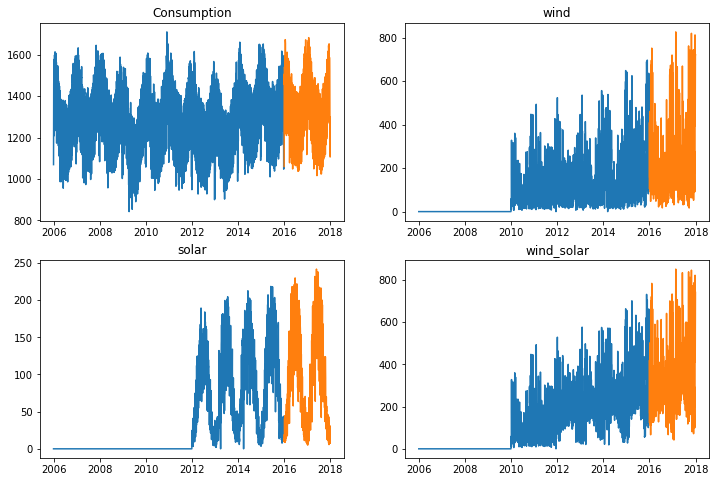

In [7]:
plt.figure(figsize=(12,8))
for ct,c in enumerate(tr.columns[:-2]):
    plt.subplot(2,2,ct+1)
    plt.plot(tr[c])
    plt.plot(te[c])
    plt.title(c)

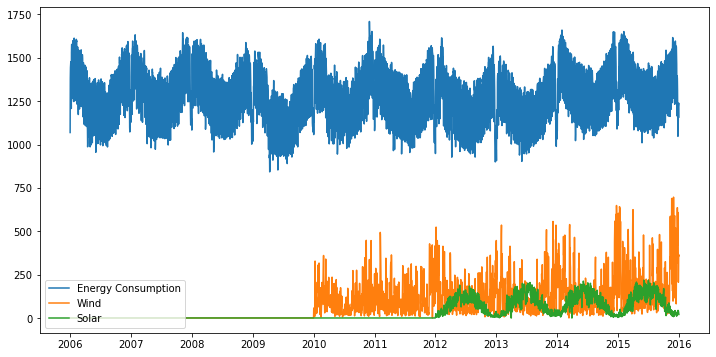

In [8]:
#plot consumption, wind, solar
plt.figure(figsize=(12,6))
plt.plot(tr.Consumption,label='Energy Consumption')
plt.plot(tr.wind,label='Wind')
plt.plot(tr.solar,label='Solar')
plt.legend(loc=3);

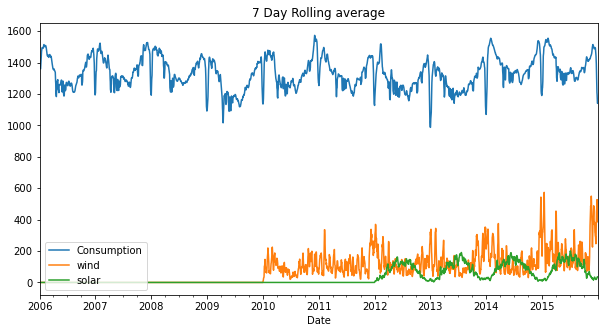

In [9]:
#Let's look at the same plot w/ a 7 day rolling average
ax = tr.iloc[:,:-3].rolling(7).mean().plot(title="7 Day Rolling average",figsize=(10,5));
ax.legend(loc=3);

##### Dig into Consumption

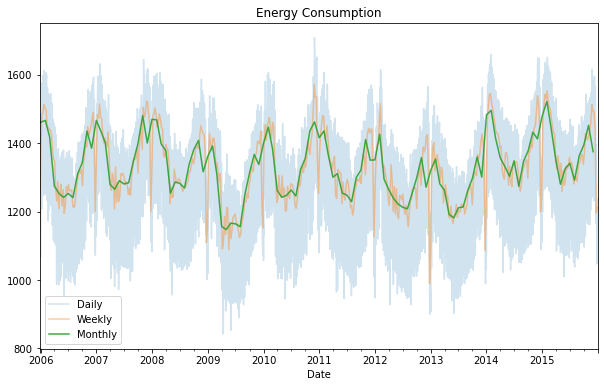

In [10]:
tr.Consumption.plot(alpha=.2, label='Daily',figsize=(10,6))
tr.Consumption.resample('w').mean().plot(alpha=.4, label='Weekly')
tr.Consumption.resample('M').mean().plot(alpha=.9, label='Monthly')
plt.legend();
plt.title("Energy Consumption");

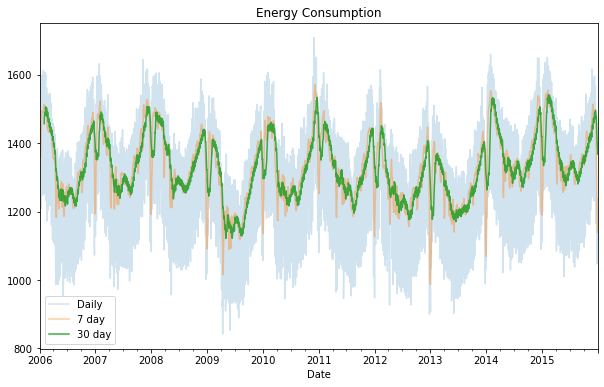

In [11]:
#same plot, rolling view instead of strict week/month
tr.Consumption.plot(alpha=.2, label='Daily',figsize=(10,6))
tr.Consumption.rolling(7).mean().plot(alpha=.4, label='7 day')
tr.Consumption.rolling(30).mean().plot(alpha=.9, label='30 day')
plt.legend();
plt.title("Energy Consumption");

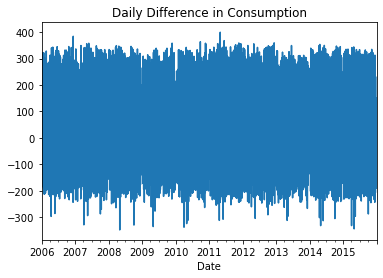

In [12]:
#Consumption Volatility
tr.Consumption.diff().plot(title='Daily Difference in Consumption');

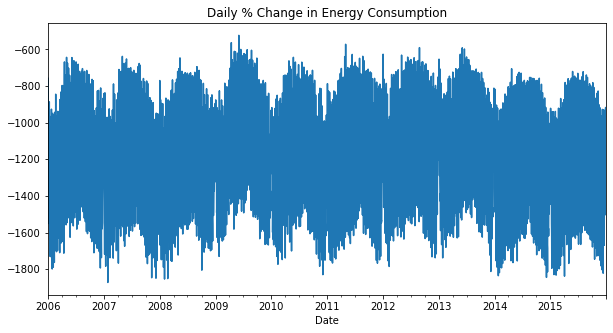

In [13]:
#Consumption Volatility as a %
# (tomorrow-today)/today
(tr.Consumption.diff() - tr.Consumption.shift()).plot(title='Daily % Change in Energy Consumption',figsize=(10,5));

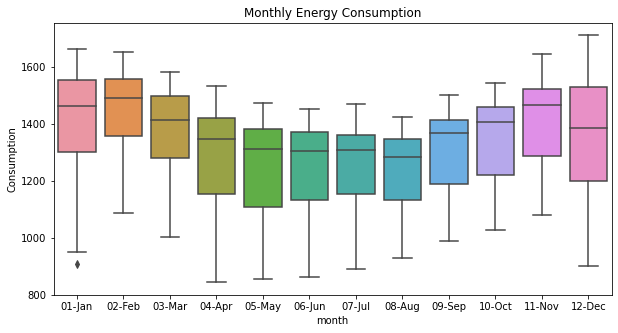

In [14]:
#let's see this as ranges
plt.figure(figsize=(10,5))
sns.boxplot(data=tr,x='month',y='Consumption')
plt.title('Monthly Energy Consumption');

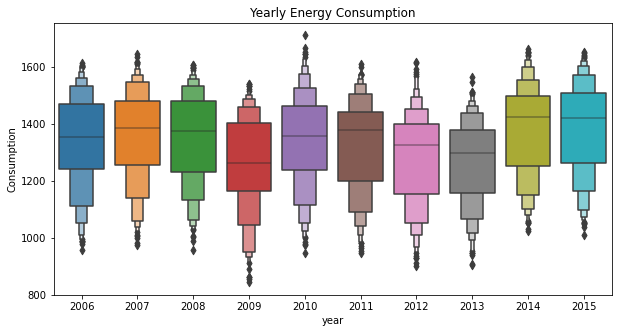

In [18]:
#Check out yearly ranges
plt.figure(figsize=(10,5))
sns.boxenplot(data=tr,x='year',y='Consumption')
plt.title('Yearly Energy Consumption');

### OPSD Explore Summary:
- Consumption:
  - Lots of noise - as demonstrated in rolling averages

## HEB store data

In [16]:
hdf = prepare.wrangle_HEB_data()

###### Split the data

In [19]:
print(f'min: {hdf.index.min()}\nmax: {hdf.index.max()}')

min: 2013-01-01 00:00:00
max: 2017-12-31 00:00:00


In [20]:
htr = hdf[:'2015']
hte = hdf['2016':]

In [22]:
htr.tail(1)

,item,quantity,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2015-12-31,40,15.0,724191,7,Amys,40,Amys Light & Lean Spaghetti Italiano,0.6,42272008063,42272008063,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,12-Dec,4-Thu,9.0


In [23]:
hte.head(1)

,item,quantity,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2016-01-01,48,40.0,875750,10,Dove,48,Dove Men + Care Antiperspirant Deodorant Cool ...,3.72,79400271631,79400271631,8503 NW Military Hwy,San Antonio,10,TX,78231,01-Jan,5-Fri,148.8


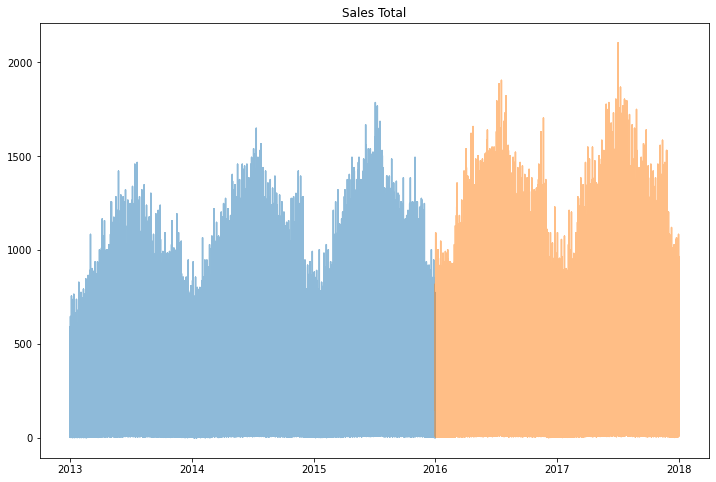

In [27]:
#visualize the split
plt.figure(figsize=(12,8))
plt.plot(htr.sales_total,alpha=.5)
plt.plot(hte.sales_total,alpha=.5)
plt.title('Sales Total');

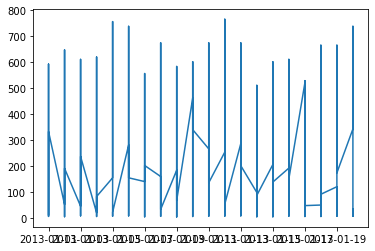

In [63]:
plt.plot(htr.index[:10000],htr.sales_total[:10000])

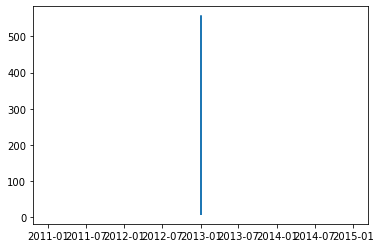

In [59]:
randox = htr.index[:100]
randoy = htr.sales_total[:100]
plt.plot(randox,randoy)


In [60]:
randox

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
      

In [61]:
htr.index[:100]

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
      

In [38]:
daily_tr = htr.resample('d').mean()
daily_te = hte.resample('d').mean()

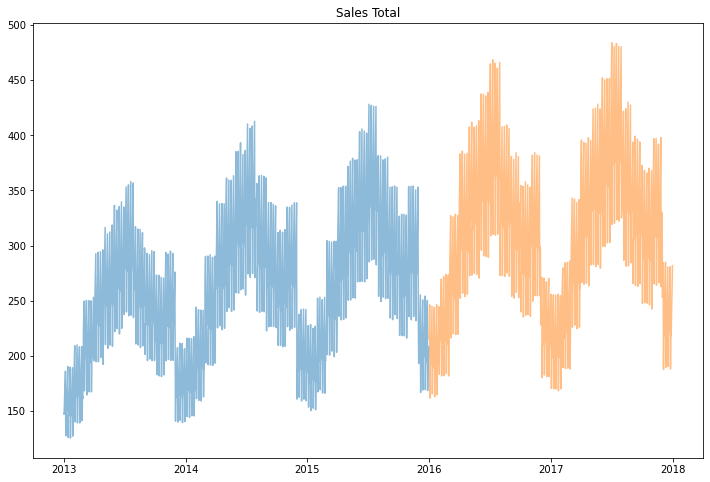

In [39]:
#visualize the split
plt.figure(figsize=(12,8))
plt.plot(daily_tr.sales_total,alpha=.5)
plt.plot(daily_te.sales_total,alpha=.5)
plt.title('Sales Total');

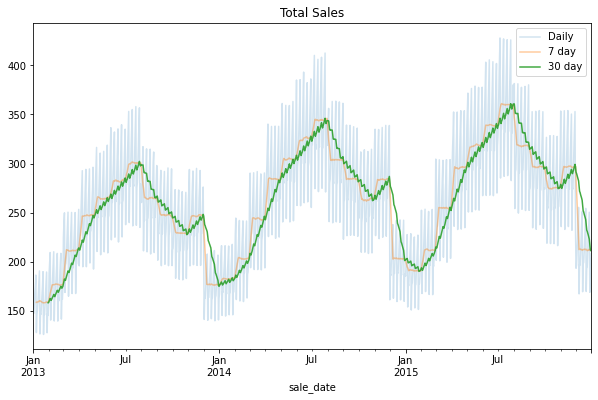

In [40]:
#Let's do some rolling plots
daily_tr.sales_total.plot(alpha=.2, label='Daily',figsize=(10,6))
daily_tr.sales_total.rolling(7).mean().plot(alpha=.4, label='7 day')
daily_tr.sales_total.rolling(30).mean().plot(alpha=.9, label='30 day')
plt.legend();
plt.title("Total Sales");

<AxesSubplot:xlabel='sale_date'>

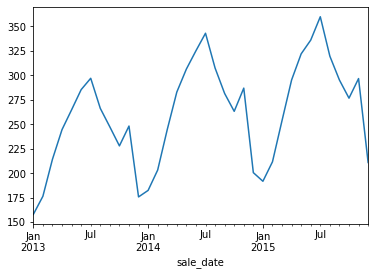

In [44]:
htr.resample('M').mean().sales_total.plot();

In [46]:
daily_tr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2013-01-01 to 2015-12-31
Freq: D
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item           1095 non-null   float64
 1   quantity       1095 non-null   float64
 2   sale_id        1095 non-null   float64
 3   store          1095 non-null   float64
 4   item_id        1095 non-null   float64
 5   item_price     1095 non-null   float64
 6   item_upc12     1095 non-null   float64
 7   item_upc14     1095 non-null   float64
 8   store_id       1095 non-null   float64
 9   store_zipcode  1095 non-null   float64
 10  sales_total    1095 non-null   float64
dtypes: float64(11)
memory usage: 102.7 KB


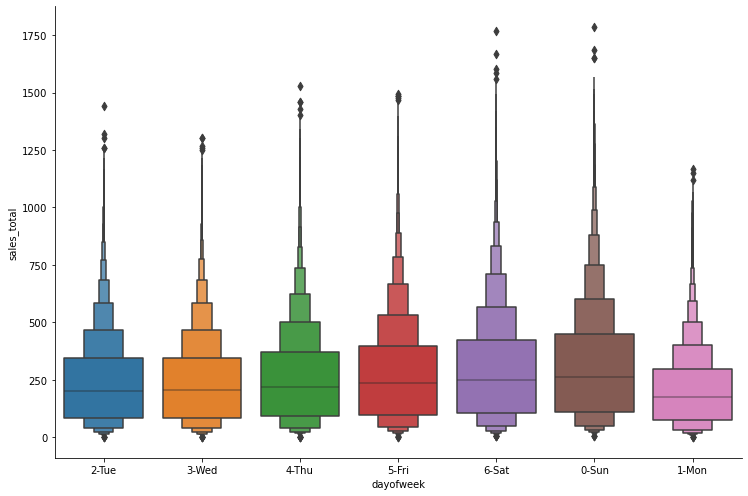

In [58]:
#Look at how it breaks out for day of week
# sns.catplot(data=daily_tr,x='dayofweek',y='sales_total')
sns.catplot(data=htr,x='dayofweek',y='sales_total',kind='boxen',height=7,aspect=1.5);

# TO DO: Polish off this explore

## My Questions:
- subsetting w/ datetime index.  Trying to pull 100 datapoints doesn't seem to work for plt.plot.  Even if I provide an x and a y, it's like it wants to set the x to the entire index. (all of this was done without creating a new variable with the subsetted data

## Explore Summary
- Sales Total:
  - Lots of variation in Sales total, likely due to days the store is closed
  - Daily resampling, helps reduce noise, but still some trends in there (doy?)
  - 7 day and 30 day rolling shows a surprising amount of steps
  
